# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [15]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [16]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

In [17]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [18]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [19]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [20]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
#建立模型

In [22]:
model = Sequential()
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=20,  
                kernel_initializer='normal', 
                activation='relu'))
model.add(Dense(units=10,  
                kernel_initializer='normal', 
                activation='softmax'))

# 訓練模型

In [23]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [24]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.3404 - accuracy: 0.9013 - val_loss: 0.1563 - val_accuracy: 0.9537
Epoch 2/10
48000/48000 [==============================] - 4s 86us/step - loss: 0.1288 - accuracy: 0.9615 - val_loss: 0.1146 - val_accuracy: 0.9661
Epoch 3/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0864 - accuracy: 0.9745 - val_loss: 0.1009 - val_accuracy: 0.9688
Epoch 4/10
48000/48000 [==============================] - 4s 91us/step - loss: 0.0643 - accuracy: 0.9801 - val_loss: 0.0902 - val_accuracy: 0.9728
Epoch 5/10
48000/48000 [==============================] - 4s 89us/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0833 - val_accuracy: 0.9753
Epoch 6/10
48000/48000 [==============================] - 4s 87us/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0860 - val_accuracy: 0.9759
Epoch 7/10
48000/48000 [==============================] - 5s 97us/st

# 以圖形顯示訓練過程

In [25]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

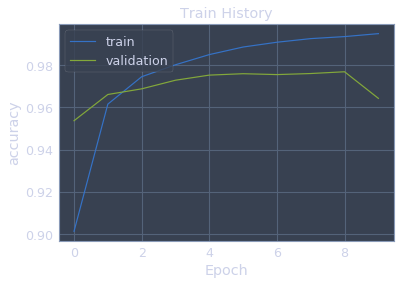

In [26]:
show_train_history(train_history,'accuracy','val_accuracy')

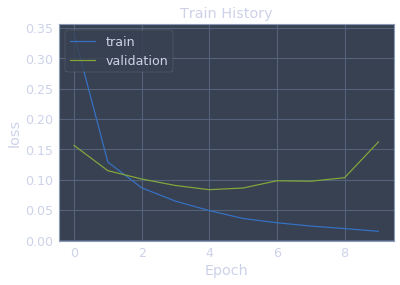

In [27]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [28]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 37us/step

accuracy= 0.9660999774932861


In [29]:
! jupyter nbconvert --to html Day_070-Keras_Mnist_MLP_HW.ipynb Day_070-Keras_Mnist_MLP_Sample.ipynb

[NbConvertApp] Converting notebook Day_070-Keras_Mnist_MLP_HW.ipynb to html
[NbConvertApp] Writing 403341 bytes to Day_070-Keras_Mnist_MLP_HW.html
[NbConvertApp] Converting notebook Day_070-Keras_Mnist_MLP_Sample.ipynb to html
[NbConvertApp] Writing 405658 bytes to Day_070-Keras_Mnist_MLP_Sample.html
